<a href="https://colab.research.google.com/github/zahamza/DeepMusicClassifier/blob/master/Sample_Input_Generation_Script.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**We need to be able to trasfer mp3 to wav**

** Way to do this is using a program called pydub and ffmpeg locally**

In [1]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt


In [2]:
from scipy import signal
from scipy.io import wavfile

In [3]:
# Since the function writes files to disk, you will need to mount
# your Google Drive. If you are working on the lab locally, you
# can comment out this code.
import os

from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


**I wrote this script for my files and drives but core ideas are the same**

---



In [4]:
#NOTE HERE

os.chdir('/content/gdrive/My Drive/data')

print(os.getcwd())

from pathlib import Path


/content/gdrive/My Drive/data


Actually creating the spectogram

Help: 
https://stackoverflow.com/questions/15961979/how-do-i-plot-a-spectrogram-the-same-way-that-pylabs-specgram-does



/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: WavFileWarning: Chunk (non-data) not understood, skipping it.
  after removing the cwd from sys.path.


44100


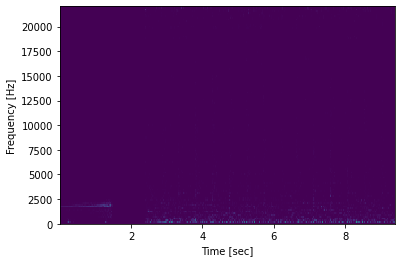

22050.0
[2.90249433e-03 7.98185941e-03 1.30612245e-02 ... 9.37433107e+00
 9.37941043e+00 9.38448980e+00]


In [5]:
filename = '9s.wav'
filepath = Path(os.getcwd(),filename)

sample_rate, samples = wavfile.read(filepath)
frequencies, times, spectrogram = signal.spectrogram(samples, sample_rate)

print(sample_rate)

plt.pcolormesh(times, frequencies, spectrogram)
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.show()

print(max(frequencies))
print(times)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: WavFileWarning: Chunk (non-data) not understood, skipping it.
  after removing the cwd from sys.path.


44100


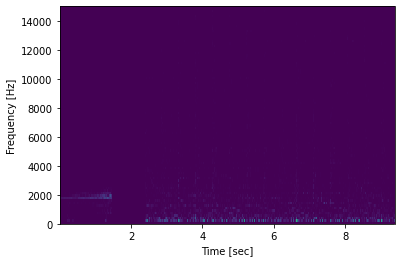

In [16]:
filename = '9s.wav'
filepath = Path(os.getcwd(),filename)

sample_rate, samples = wavfile.read(filepath)
frequencies, times, spectrogram = signal.spectrogram(samples, sample_rate)

print(sample_rate)

plt.pcolormesh(times, frequencies, spectrogram)
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.ylim(top=15000)

my_dpi=100
plt.figure(figsize=(124/my_dpi, 124/my_dpi), dpi=my_dpi)
plt.savefig(Path(os.getcwd(), 'Example'),dpi=my_dpi)
plt.imsave(Path(os.getcwd(), 'Example'),cmap='gray')

plt.show()


Text(0.5, 1.0, 'Spectogram - Happy')

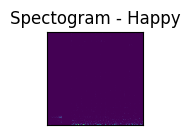

In [21]:
my_dpi=100

fig = plt.figure(figsize=(124/my_dpi, 124/my_dpi), dpi=my_dpi)

ax1 = fig.add_subplot(111)
ax1.set_xticks([])
ax1.set_yticks([])
ax1.pcolormesh(times, frequencies, spectrogram)
plt.savefig(Path(os.getcwd(), 'Example'),dpi=my_dpi)

# Save the generated figure as a grey scale image

from PIL import Image
Image.open(Path(os.getcwd(), 'Example.png')).convert('L').save('Example_bw.png')

ax1.set_title('Spectogram - Happy')




In [ ]:
fig = plt.figure()
fig.savefig('full_figure.png')


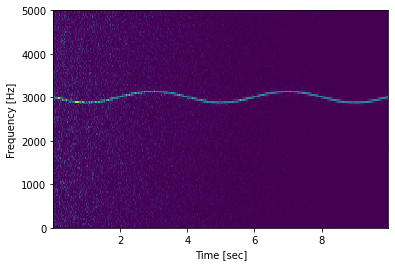

In [ ]:
fs = 10e3
N = 1e5
amp = 2 * np.sqrt(2)
noise_power = 0.01 * fs / 2
time = np.arange(N) / float(fs)
mod = 500*np.cos(2*np.pi*0.25*time)
carrier = amp * np.sin(2*np.pi*3e3*time + mod)
noise = np.random.normal(scale=np.sqrt(noise_power), size=time.shape)
noise *= np.exp(-time/5)
x = carrier + noise

# Compute and plot the spectrogram.

f, t, Sxx = signal.spectrogram(x, fs)
plt.pcolormesh(t, f, Sxx)
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.show()

In [ ]:
import librosa

In [ ]:
y, sr = librosa.load(filename)

# 2. Load the audio as a waveform `y`
#    Store the sampling rate as `sr`
y, sr = librosa.load(filename)

# 3. Run the default beat tracker
tempo, beat_frames = librosa.beat.beat_track(y=y, sr=sr)

print('Estimated tempo: {:.2f} beats per minute'.format(tempo))

# 4. Convert the frame indices of beat events into timestamps
beat_times = librosa.frames_to_time(beat_frames, sr=sr)

In [ ]:
songname = filename

# Compute features

y, sr = librosa.load(songname)
tempo, beat_frames = librosa.beat.beat_track(y=y, sr=sr)
chroma_stft = librosa.feature.chroma_stft(y=y, sr=sr)
rmse = librosa.feature.rmse(y=y)
spec_cent = librosa.feature.spectral_centroid(y=y, sr=sr)
spec_bw = librosa.feature.spectral_bandwidth(y=y, sr=sr)
rolloff = librosa.feature.spectral_rolloff(y=y, sr=sr)
zcr = librosa.feature.zero_crossing_rate(y)
mfcc = librosa.feature.mfcc(y=y, sr=sr)

/usr/local/lib/python3.6/dist-packages/librosa/beat.py:306: DeprecationWarning: np.asscalar(a) is deprecated since NumPy v1.16, use a.item() instead
  hop_length=hop_length))


In [ ]:
# Get Single features to use for simple ML models

beats = beat_frames.shape[0]

# Use the average value
chroma_stft = np.mean(chroma_stft)
rmse = np.mean(rmse)
spec_cent = np.mean(spec_cent)
spec_bw = np.mean(spec_bw)
rolloff = np.mean(rolloff)
zcr = np.mean(zcr)
mfcc = np.mean(mfcc)